# Lab Exercise 5: Deep Learning

# Introduction
In the fifth and final lab session, the aim is to implement more advanced algorithms for deep learning.
Concretely, we will apply a convolutional neural network to a classification task, and an autoencoder in
order to derive a set of features in an unsupervised manner.
After completing the tasks, you should write a report in PDF that includes the results of all tasks. To
submit your solution, create a compressed file that includes your source code and the report, and upload the
compressed file to the Aula Global

In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, MaxPooling2D, AveragePooling2D, Flatten, Dense, Activation, Dropout, Input, Reshape
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from scipy.io import loadmat
from keras.optimizers import Adam

# 2. Convolutional Neural Network

### Tasks:
1. Train a convolutional neural network with a softmax layer in order to predict the type of flower.
2. Experiment with different numbers and sizes of convolutional layers to reduce the prediction error

In [2]:
# Define the directories
data_dir = 'C:/Users/obeyk/Desktop/UPF/Trimester 1/Data Science/Assignments/4_Deep Learning/flower_photos'

In [3]:
# Define parameters for the generators
target_size = (64, 64)
batch_size = 32
INPUT_SIZE = target_size[0]

In [4]:
# Load and augment the dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [5]:
# Create train and validation generators
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [107]:
#####################################################
# TASK 0: Gridsearch for Different Dropout Rates
#####################################################

# Dropout rates to test
dropout_rates = [0.1, 0.3, 0.5]

# Store results
best_accuracy = 0
best_dropout_rate = None

# Gridsearch Iteration for Dropout Rates
for dropout_rate in dropout_rates:
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))
    model.add(Activation('relu'))
    model.add(AveragePooling2D())

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(AveragePooling2D())

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(AveragePooling2D())

    # Flatten and add dense layers
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(5, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // validation_generator.batch_size,
        epochs=25,
        verbose=1,
        shuffle=True
    )

    # Evaluate model performance on validation set
    validation_loss, validation_accuracy = model.evaluate(validation_generator)

    # Check if current dropout rate configuration is the best
    if validation_accuracy > best_accuracy:
        best_accuracy = validation_accuracy
        best_dropout_rate = dropout_rate

# Print or return the best dropout rate
print("Best dropout rate:", best_dropout_rate)

Epoch 1/25
91/91 [==============================] - 14s 145ms/step - loss: 1.3385 - accuracy: 0.4142 - val_loss: 1.2686 - val_accuracy: 0.4517
Epoch 2/25
91/91 [==============================] - 11s 125ms/step - loss: 1.1864 - accuracy: 0.4974 - val_loss: 1.2167 - val_accuracy: 0.4759
Epoch 3/25
91/91 [==============================] - 12s 128ms/step - loss: 1.1171 - accuracy: 0.5415 - val_loss: 1.1774 - val_accuracy: 0.5526
Epoch 4/25
91/91 [==============================] - 12s 131ms/step - loss: 1.0773 - accuracy: 0.5824 - val_loss: 1.1838 - val_accuracy: 0.4616
Epoch 5/25
91/91 [==============================] - 12s 132ms/step - loss: 1.0064 - accuracy: 0.6020 - val_loss: 1.1090 - val_accuracy: 0.5724
Epoch 6/25
91/91 [==============================] - 12s 132ms/step - loss: 0.9706 - accuracy: 0.6206 - val_loss: 0.9994 - val_accuracy: 0.6264
Epoch 7/25
91/91 [==============================] - 12s 131ms/step - loss: 0.9082 - accuracy: 0.6495 - val_loss: 0.9923 - val_accuracy: 0.6151

Epoch 7/25
91/91 [==============================] - 13s 145ms/step - loss: 0.9623 - accuracy: 0.6237 - val_loss: 0.9876 - val_accuracy: 0.6108
Epoch 8/25
91/91 [==============================] - 12s 133ms/step - loss: 0.9320 - accuracy: 0.6398 - val_loss: 1.0074 - val_accuracy: 0.6051
Epoch 9/25
91/91 [==============================] - 12s 131ms/step - loss: 0.9042 - accuracy: 0.6440 - val_loss: 0.9234 - val_accuracy: 0.6136
Epoch 10/25
91/91 [==============================] - 13s 138ms/step - loss: 0.8947 - accuracy: 0.6539 - val_loss: 0.9267 - val_accuracy: 0.6349
Epoch 11/25
91/91 [==============================] - 13s 138ms/step - loss: 0.8397 - accuracy: 0.6811 - val_loss: 0.9288 - val_accuracy: 0.6506
Epoch 12/25
91/91 [==============================] - 15s 162ms/step - loss: 0.8387 - accuracy: 0.6901 - val_loss: 0.9343 - val_accuracy: 0.6392
Epoch 13/25
91/91 [==============================] - 14s 156ms/step - loss: 0.7993 - accuracy: 0.6983 - val_loss: 0.8634 - val_accuracy: 0.

In [8]:
###################################################################
# TASK 1: Train a convolutional neural network with a softmax layer
###################################################################

# Build the CNN model
model = Sequential()

# Convolutional layers
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))
model.add(Activation('relu'))
model.add(AveragePooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(AveragePooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(AveragePooling2D())

# Flatten and add dense layers
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

# Define optimizer and compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=25,
    verbose=1,
    shuffle=True
)

Epoch 1/25
91/91 [==============================] - 113s 1s/step - loss: 1.4259 - accuracy: 0.3423 - val_loss: 1.2642 - val_accuracy: 0.4460
Epoch 2/25
91/91 [==============================] - 26s 289ms/step - loss: 1.2238 - accuracy: 0.4665 - val_loss: 1.2222 - val_accuracy: 0.5043
Epoch 3/25
91/91 [==============================] - 28s 305ms/step - loss: 1.1682 - accuracy: 0.5277 - val_loss: 1.1290 - val_accuracy: 0.5384
Epoch 4/25
91/91 [==============================] - 29s 322ms/step - loss: 1.1117 - accuracy: 0.5528 - val_loss: 1.1079 - val_accuracy: 0.5426
Epoch 5/25
91/91 [==============================] - 28s 307ms/step - loss: 1.0622 - accuracy: 0.5765 - val_loss: 1.0923 - val_accuracy: 0.5895
Epoch 6/25
91/91 [==============================] - 28s 305ms/step - loss: 0.9885 - accuracy: 0.6054 - val_loss: 1.0254 - val_accuracy: 0.6179
Epoch 7/25
91/91 [==============================] - 27s 298ms/step - loss: 0.9635 - accuracy: 0.6244 - val_loss: 0.9964 - val_accuracy: 0.6335
E

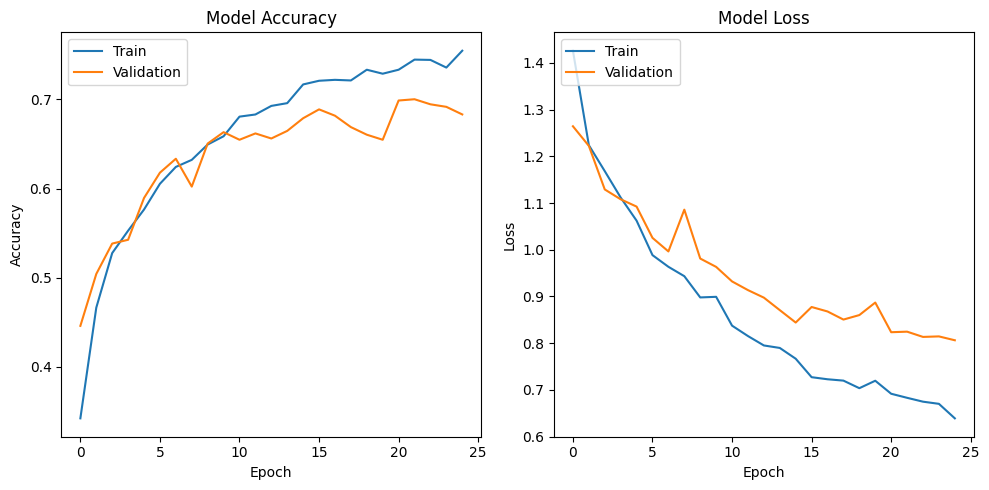

In [10]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Epoch 1/25
91/91 [==============================] - 13s 137ms/step - loss: 1.3536 - accuracy: 0.3953 - val_loss: 1.2805 - val_accuracy: 0.4318
Epoch 2/25
91/91 [==============================] - 13s 143ms/step - loss: 1.1575 - accuracy: 0.5212 - val_loss: 1.1620 - val_accuracy: 0.5455
Epoch 3/25
91/91 [==============================] - 15s 169ms/step - loss: 1.0690 - accuracy: 0.5783 - val_loss: 1.0682 - val_accuracy: 0.5753
Epoch 4/25
91/91 [==============================] - 15s 164ms/step - loss: 1.0459 - accuracy: 0.5900 - val_loss: 1.1105 - val_accuracy: 0.5710
Epoch 5/25
91/91 [==============================] - 16s 173ms/step - loss: 0.9874 - accuracy: 0.6189 - val_loss: 1.0266 - val_accuracy: 0.6023
Epoch 6/25
91/91 [==============================] - 15s 165ms/step - loss: 0.9512 - accuracy: 0.6175 - val_loss: 1.0113 - val_accuracy: 0.6122
Epoch 7/25
91/91 [==============================] - 15s 167ms/step - loss: 0.9284 - accuracy: 0.6378 - val_loss: 1.0965 - val_accuracy: 0.6108

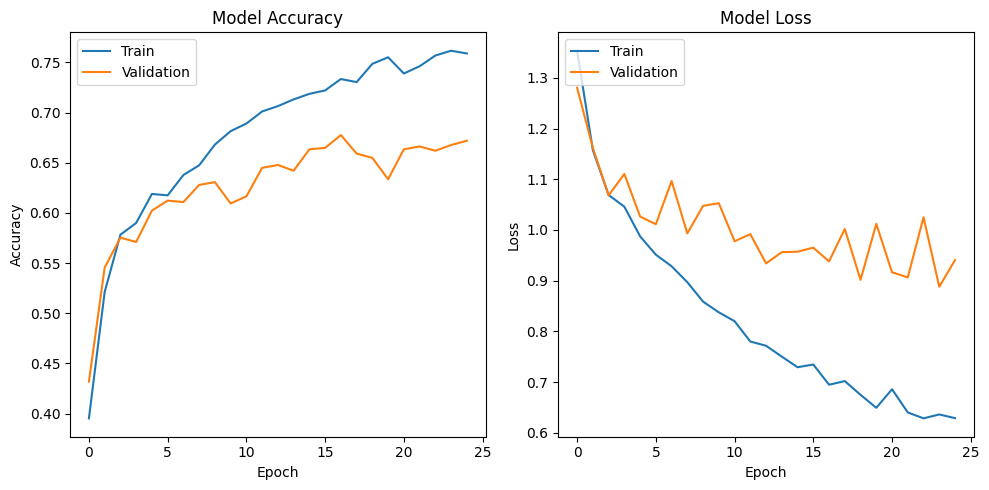

In [11]:
##############################################################################
# TASK 2: Experiment with different numbers of convolutional layers (2 Layers)
##############################################################################

# VERSION 2: TWO CON LAYERS

# Build the CNN model
model = Sequential()

# Convolutional layers
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))
model.add(Activation('relu'))
model.add(AveragePooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(AveragePooling2D())

# Flatten add dense layers
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

# Define optimizer and compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=25,
    verbose=1,
    shuffle=True
)

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Epoch 1/25
91/91 [==============================] - 17s 181ms/step - loss: 1.4431 - accuracy: 0.3536 - val_loss: 1.3115 - val_accuracy: 0.4119
Epoch 2/25
91/91 [==============================] - 15s 165ms/step - loss: 1.2790 - accuracy: 0.4345 - val_loss: 1.2510 - val_accuracy: 0.4403
Epoch 3/25
91/91 [==============================] - 14s 152ms/step - loss: 1.2047 - accuracy: 0.4782 - val_loss: 1.1715 - val_accuracy: 0.5085
Epoch 4/25
91/91 [==============================] - 14s 152ms/step - loss: 1.1168 - accuracy: 0.5511 - val_loss: 1.1154 - val_accuracy: 0.5554
Epoch 5/25
91/91 [==============================] - 16s 179ms/step - loss: 1.0432 - accuracy: 0.5779 - val_loss: 1.0290 - val_accuracy: 0.5938
Epoch 6/25
91/91 [==============================] - 15s 170ms/step - loss: 0.9804 - accuracy: 0.6137 - val_loss: 1.0452 - val_accuracy: 0.6250
Epoch 7/25
91/91 [==============================] - 19s 208ms/step - loss: 0.9537 - accuracy: 0.6316 - val_loss: 0.9998 - val_accuracy: 0.6250

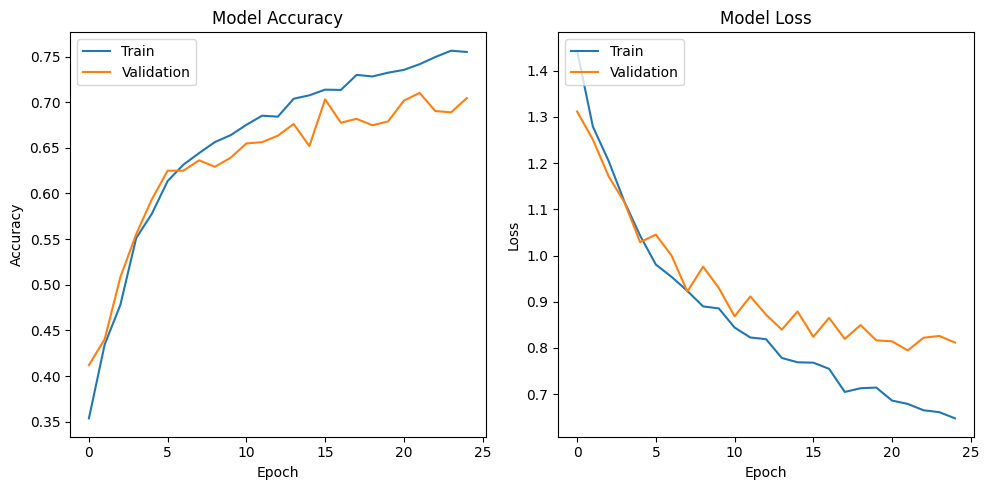

In [12]:
# VERSION 3: FOUR CON LAYERS

# Build the CNN model
model = Sequential()

# Convolutional layers
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))
model.add(Activation('relu'))
model.add(AveragePooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(AveragePooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(AveragePooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(AveragePooling2D())

# Flatten add dense layers
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

# Define optimizer and compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=25,
    verbose=1,
    shuffle=True
)

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# 3. Autoencoder

### Tasks:
1. Train an autoencoder on a set of input images in order to automatically extract features that are good predictors of digits in images.
2. Train a second autoencoder whose input is the output of the first autoencoder.
3. Train a softmax layer whose input is the output of the second autoencoder, and whose output is a predictor of the class (i.e. digit).
4. Construct a deep neural network such that the first hidden layer is the first autoencoder, the second hidden layer is the second autoencoder, and the output layer is given by the softmax layer. Report the test performance of the resulting deep network.
5. Retrain the deep network in order to fine-tune the weights, and report the test performance after retraining the network.

In [116]:
######################################
# Task 0: Load and Preprocess Dataset
######################################

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Use a subset of 5000 samples for training and testing
train_images = train_images[:5000]
train_labels = train_labels[:5000]
test_images = test_images[:5000]
test_labels = test_labels[:5000]

# Preprocess the data: Flatten and normalize the images
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255.0

In [117]:
##################################################
# Task 1: Train an autoencoder to extract features
##################################################

# Define the architecture of the autoencoder
input_img = Input(shape=(28, 28, 1))

# Encoder layers
encoded = Flatten()(input_img)
encoded = Dense(784, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

# Decoder layers
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
decoded = Reshape((28, 28, 1))(decoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(train_images, train_images, epochs=500, batch_size=32, shuffle=True)

# Get encoded features from the first autoencoder
encoded_features = autoencoder.predict(train_images)

Epoch 1/500
157/157 [==============================] - 3s 10ms/step - loss: 0.2627
Epoch 2/500
157/157 [==============================] - 2s 10ms/step - loss: 0.1654
Epoch 3/500
157/157 [==============================] - 2s 10ms/step - loss: 0.1434
Epoch 4/500
157/157 [==============================] - 7s 15ms/step - loss: 0.1318
Epoch 5/500
157/157 [==============================] - 2s 16ms/step - loss: 0.1246
Epoch 6/500
157/157 [==============================] - 2s 14ms/step - loss: 0.1197
Epoch 7/500
157/157 [==============================] - 2s 11ms/step - loss: 0.1162
Epoch 8/500
157/157 [==============================] - 2s 10ms/step - loss: 0.1131
Epoch 9/500
157/157 [==============================] - 2s 10ms/step - loss: 0.1104
Epoch 10/500
157/157 [==============================] - 2s 10ms/step - loss: 0.1081
Epoch 11/500
157/157 [==============================] - 2s 10ms/step - loss: 0.1060
Epoch 12/500
157/157 [==============================] - 2s 10ms/step - loss: 0.1042
E

157/157 [==============================] - 1s 9ms/step - loss: 0.0755
Epoch 197/500
157/157 [==============================] - 1s 9ms/step - loss: 0.0754
Epoch 198/500
157/157 [==============================] - 1s 9ms/step - loss: 0.0751
Epoch 199/500
157/157 [==============================] - 1s 9ms/step - loss: 0.0754
Epoch 200/500
157/157 [==============================] - 1s 9ms/step - loss: 0.0751
Epoch 201/500
157/157 [==============================] - 1s 9ms/step - loss: 0.0753
Epoch 202/500
157/157 [==============================] - 1s 9ms/step - loss: 0.0755
Epoch 203/500
157/157 [==============================] - 1s 9ms/step - loss: 0.0752
Epoch 204/500
157/157 [==============================] - 1s 9ms/step - loss: 0.0751
Epoch 205/500
157/157 [==============================] - 1s 9ms/step - loss: 0.0753
Epoch 206/500
157/157 [==============================] - 1s 9ms/step - loss: 0.0752
Epoch 207/500
157/157 [==============================] - 1s 9ms/step - loss: 0.0752
Epoch 

157/157 [==============================] - 2s 12ms/step - loss: 0.0735
Epoch 390/500
157/157 [==============================] - 2s 15ms/step - loss: 0.0734
Epoch 391/500
157/157 [==============================] - 2s 13ms/step - loss: 0.0734
Epoch 392/500
157/157 [==============================] - 2s 12ms/step - loss: 0.0736
Epoch 393/500
157/157 [==============================] - 2s 12ms/step - loss: 0.0733
Epoch 394/500
157/157 [==============================] - 3s 16ms/step - loss: 0.0736
Epoch 395/500
157/157 [==============================] - 2s 11ms/step - loss: 0.0733
Epoch 396/500
157/157 [==============================] - 2s 10ms/step - loss: 0.0733
Epoch 397/500
157/157 [==============================] - 2s 11ms/step - loss: 0.0731
Epoch 398/500
157/157 [==============================] - 3s 17ms/step - loss: 0.0732
Epoch 399/500
157/157 [==============================] - 2s 13ms/step - loss: 0.0734
Epoch 400/500
157/157 [==============================] - 2s 12ms/step - loss: 0

1/1 [==============================] - 0s 42ms/step


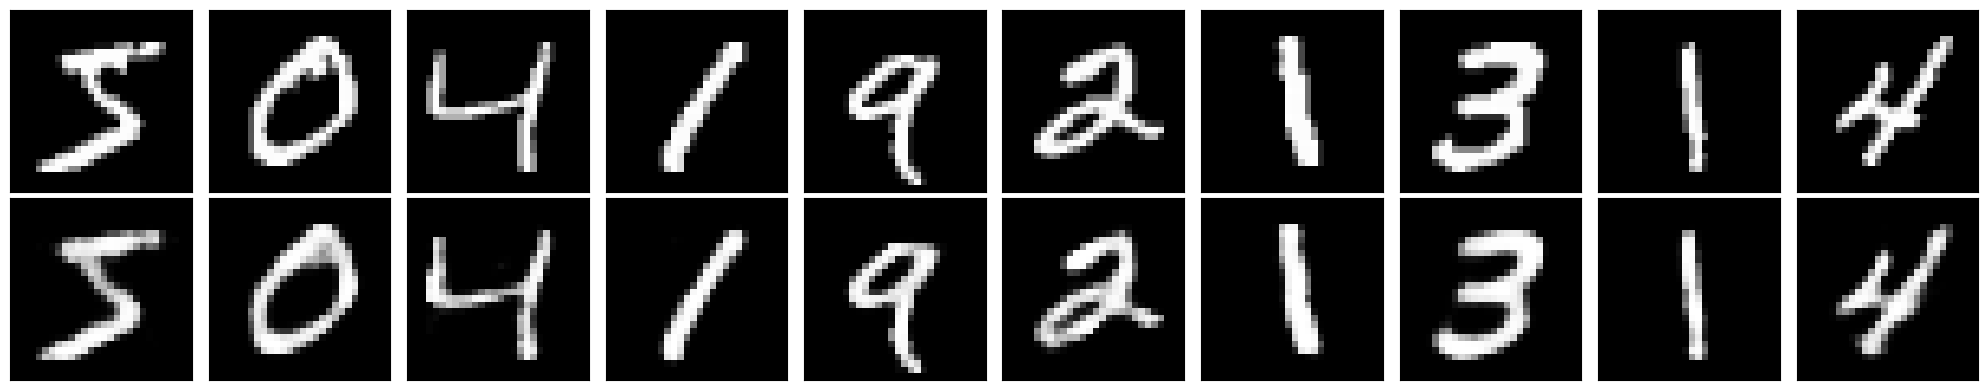

In [118]:
# Reconstruct some images using the trained autoencoder
reconstructed_images = autoencoder.predict(train_images[:10])

# Plotting original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

In [119]:
#####################################
# Task 2: Train a second autoencoder
#####################################
# Reshape encoded features to match the input shape of the second autoencoder
encoded_features_flat = encoded_features.reshape((encoded_features.shape[0], -1))

# Define the architecture of the second autoencoder
input_encoded = Input(shape=(784,))  # Shape matches the flattened shape of the images

# Decoder layers for the second autoencoder
decoded_second = Dense(64, activation='relu')(input_encoded)
decoded_second = Dense(128, activation='relu')(decoded_second)
decoded_second = Dense(784, activation='sigmoid')(decoded_second)  # Output shape matches input shape
decoded_second = Reshape((28, 28, 1))(decoded_second)

# Create the second autoencoder model
autoencoder_second = Model(input_encoded, decoded_second)

# Compile the second autoencoder model
autoencoder_second.compile(optimizer='adam', loss='mean_squared_error')

# Train the second autoencoder using reshaped encoded features from the first autoencoder
autoencoder_second.fit(encoded_features_flat, train_images, epochs=500, batch_size=32, shuffle=True)

Epoch 1/500
157/157 [==============================] - 1s 3ms/step - loss: 0.0703
Epoch 2/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0352
Epoch 3/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0265
Epoch 4/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0215
Epoch 5/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0183
Epoch 6/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0161
Epoch 7/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0145
Epoch 8/500
157/157 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 9/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 10/500
157/157 [==============================] - 0s 2ms/step - loss: 0.0116
Epoch 11/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 12/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0104
Epoch 13/500


157/157 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 197/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 198/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 199/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 200/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 201/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 202/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 203/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 204/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 205/500
157/157 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 206/500
157/157 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 207/500
157/157 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 

157/157 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 391/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 392/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 393/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 394/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 395/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 396/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 397/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 398/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 399/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 400/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 401/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 

In [122]:
################################
# Task 3: Train a softmax layer
################################

# Extract encoded features from the second autoencoder and flatten them
encoded_features_second = autoencoder_second.predict(encoded_features_flat)
encoded_features_flat_second = encoded_features_second.reshape((encoded_features_second.shape[0], -1))

# Define the softmax classifier on top of the encoded features
softmax_input = Input(shape=(encoded_features_flat_second.shape[1],))

# Softmax layer for classification
softmax_output = Dense(10, activation='softmax')(softmax_input)

# Create the softmax model
softmax_model = Model(softmax_input, softmax_output)

# Compile the softmax model
softmax_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the softmax layer using flattened encoded features and labels
softmax_model.fit(encoded_features_flat_second, train_labels, epochs=150, batch_size=32, validation_split=0.2)

157/157 [==============================] - 0s 2ms/step
Epoch 1/150
125/125 [==============================] - 1s 3ms/step - loss: 1.3249 - accuracy: 0.6787 - val_loss: 0.8126 - val_accuracy: 0.8240
Epoch 2/150
125/125 [==============================] - 0s 2ms/step - loss: 0.6535 - accuracy: 0.8605 - val_loss: 0.5744 - val_accuracy: 0.8660
Epoch 3/150
125/125 [==============================] - 0s 2ms/step - loss: 0.5011 - accuracy: 0.8800 - val_loss: 0.4899 - val_accuracy: 0.8800
Epoch 4/150
125/125 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.8945 - val_loss: 0.4449 - val_accuracy: 0.8900
Epoch 5/150
125/125 [==============================] - 0s 2ms/step - loss: 0.3825 - accuracy: 0.9020 - val_loss: 0.4126 - val_accuracy: 0.8900
Epoch 6/150
125/125 [==============================] - 0s 2ms/step - loss: 0.3520 - accuracy: 0.9125 - val_loss: 0.3933 - val_accuracy: 0.8940
Epoch 7/150
125/125 [==============================] - 0s 2ms/step - loss: 0.3305 - acc

Epoch 114/150
125/125 [==============================] - 0s 2ms/step - loss: 0.0584 - accuracy: 0.9895 - val_loss: 0.4095 - val_accuracy: 0.9070
Epoch 115/150
125/125 [==============================] - 0s 2ms/step - loss: 0.0572 - accuracy: 0.9895 - val_loss: 0.4126 - val_accuracy: 0.9060
Epoch 116/150
125/125 [==============================] - 0s 2ms/step - loss: 0.0575 - accuracy: 0.9895 - val_loss: 0.4128 - val_accuracy: 0.9020
Epoch 117/150
125/125 [==============================] - 0s 2ms/step - loss: 0.0567 - accuracy: 0.9895 - val_loss: 0.4139 - val_accuracy: 0.9030
Epoch 118/150
125/125 [==============================] - 0s 2ms/step - loss: 0.0556 - accuracy: 0.9905 - val_loss: 0.4136 - val_accuracy: 0.9070
Epoch 119/150
125/125 [==============================] - 0s 2ms/step - loss: 0.0549 - accuracy: 0.9900 - val_loss: 0.4183 - val_accuracy: 0.9060
Epoch 120/150
125/125 [==============================] - 0s 2ms/step - loss: 0.0540 - accuracy: 0.9915 - val_loss: 0.4227 - val_ac

In [123]:
#########################################
# Task 4: Construct a deep neural network
#########################################

# Input for the deep neural network
input_img = Input(shape=(28, 28, 1))

# Create the first autoencoder model (autoencoder)
encoded_features_first = autoencoder(input_img)

flatten_outputs= Flatten()(encoded_features_first)

# Create the second autoencoder model (autoencoder_second)
encoded_features_second = autoencoder_second(flatten_outputs)

# Flatten the output of the second autoencoder
flatten_output = Flatten()(encoded_features_second)

# Softmax layer for classification
softmax_output = Dense(10, activation='softmax')(flatten_output)

# Create a model for the entire deep neural network
deep_neural_network = Model(input_img, softmax_output)

# Compile the deep neural network
deep_neural_network.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Evaluate the performance on the test set
test_loss, test_accuracy = deep_neural_network.evaluate(test_images, test_labels)
print(f"Test Accuracy Before Training: {test_accuracy * 100:.2f}%")

157/157 [==============================] - 1s 5ms/step - loss: 2.4602 - accuracy: 0.0470
Test Accuracy Before Training: 4.70%


In [124]:
####################################################################
# Task 5: Retrain the deep network in order to fine-tune the weights
####################################################################

# Retrain the deep neural network for additional epochs
history = deep_neural_network.fit(
    train_images,
    train_labels,
    epochs=30,
    batch_size=32,
    validation_split=0.2
)

# Evaluate the performance on the test set after retraining
test_loss, test_accuracy = deep_neural_network.evaluate(test_images, test_labels)
print(f"Test Accuracy after retraining: {test_accuracy * 100:.2f}%")

Epoch 1/30
125/125 [==============================] - 3s 13ms/step - loss: 0.7823 - accuracy: 0.7738 - val_loss: 0.3425 - val_accuracy: 0.8960
Epoch 2/30
125/125 [==============================] - 2s 13ms/step - loss: 0.2234 - accuracy: 0.9350 - val_loss: 0.2630 - val_accuracy: 0.9200
Epoch 3/30
125/125 [==============================] - 2s 13ms/step - loss: 0.1217 - accuracy: 0.9622 - val_loss: 0.2689 - val_accuracy: 0.9230
Epoch 4/30
125/125 [==============================] - 2s 12ms/step - loss: 0.0753 - accuracy: 0.9800 - val_loss: 0.3066 - val_accuracy: 0.9150
Epoch 5/30
125/125 [==============================] - 2s 12ms/step - loss: 0.0841 - accuracy: 0.9740 - val_loss: 0.3662 - val_accuracy: 0.9070
Epoch 6/30
125/125 [==============================] - 2s 12ms/step - loss: 0.0492 - accuracy: 0.9827 - val_loss: 0.2562 - val_accuracy: 0.9420
Epoch 7/30
125/125 [==============================] - 2s 13ms/step - loss: 0.0380 - accuracy: 0.9893 - val_loss: 0.2884 - val_accuracy: 0.9320

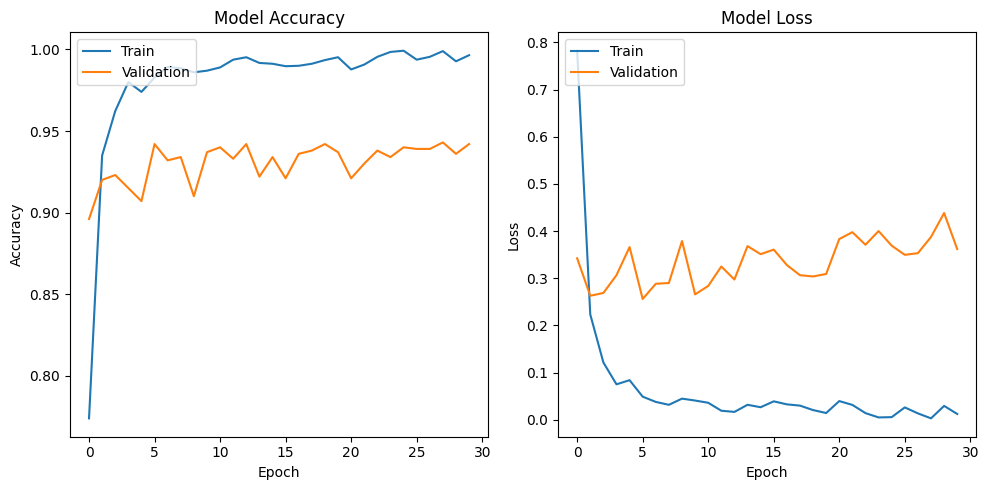

In [125]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()